# 스타벅스 매장 크롤링

In [1]:
import urllib.request
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
wd = webdriver.Chrome('C:/Users/윤영훈/크롤링기말프로젝트/chromedriver.exe')

In [3]:
wd.get('https://www.starbucks.co.kr/store/store_map.do?disp=locale')

In [4]:
wd.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [6]:
wd.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [7]:
html = wd.page_source

In [8]:
soup = BeautifulSoup(html,'html.parser')

In [9]:
print(soup.prettify())

<html lang="ko">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="website" property="og:type"/>
  <meta content="Starbucks" property="og:title"/>
  <meta content="https://www.starbucks.co.kr/" property="og:url"/>
  <meta content="https://image.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
  <meta content="Starbucks" property="og:description"/>
  <title id="titleJoin">
   Starbucks Coffee Korea
  </title>
  <link href="https://image.istarbucks.co.kr/common/img/common/favicon.ico?v=200828" rel="shortcut icon" type="image/ico"/>
  <!-- 20200827 파비콘 교체 및 CDN 변수처리 -->
  <link href="/common/css/reset.css" rel="stylesheet"/>
  <link href="/common/css/style.css?v=200130" rel="stylesheet"/>
  <link href="/common/css/jquery.bxslider.css" rel="stylesheet"/>
  <link href="/common/css/idangerou

In [54]:
starbucks_list=soup.select("#mCSB_3_container > ul > li")

[<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong>논현역사거리  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>152

In [23]:
starbucks_list[0]

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [52]:
lat=starbucks_list[0]['data-lat']

In [53]:
long=starbucks_list[0]['data-long']

In [46]:
store_info=list(starbucks_list[0].strings)

In [47]:
store_info

[' ',
 '역삼아레나빌딩  ',
 ' ',
 '서울특별시 강남구 언주로 425 (역삼동)',
 '1522-3232',
 ' ',
 '리저브 매장 2번']

In [48]:
store_name=store_info[1].string.strip()

'역삼아레나빌딩'

### 서울상가정보 파일에서 이디야만 따로 저장하기

In [274]:
import pandas as pd

In [277]:
data = pd.read_csv('서울상권정보.csv', engine="python")

In [ ]:
data = data[data['상호명'].str.contains('EDIYA|ediya|이디야')]

In [87]:
data.to_csv("서울이디야매장정보.csv", index=False, encoding="utf-8-sig")

In [88]:
data.shape

(471, 39)

In [89]:
len(data)

471

### 마커찍기 위한 라이브러리, 지도 생성

In [266]:
import folium

In [267]:
map_GIS = folium.Map(location=[37.560284,126.975334], zoom_start = 13)

### 서울이디야매장 csv파일 가져와서 지도에 마커찍기

In [268]:
ediya = pd.read_csv('서울이디야매장정보.csv')

In [269]:
for i,center in ediya.iterrows():
    folium.Marker(location=[center['위도'], center['경도']], popup=(center['상호명']), icon=folium.Icon(color='blue', icon='star')).add_to(map_GIS)

In [270]:
map_GIS

### 스타벅스 매장 마커 찍기

In [279]:
data = pd.read_csv('서울스타벅스매장.csv', encoding='cp949')
data.head()

,Unnamed: 0,매장명,주소명,위도,경도
0,0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,4,스탈릿대치R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


In [280]:
map_GIS = folium.Map(location=[37.560284,126.975334], zoom_start = 13)

In [281]:
for i,center in data.iterrows():
    folium.Marker(location=[center['위도'], center['경도']], popup=(center['매장명']), icon=folium.Icon(color='green', icon='star')).add_to(map_GIS)

In [282]:
map_GIS

In [47]:
map_GIS.save('map_GIS.html')

### 스타벅스 데이터 시, 구 나누기

In [42]:
data = pd.read_csv('서울스타벅스매장.csv', index_col=0, encoding='CP949', engine='python')

data.head() #작업내용 확인용 출력

,매장명,주소명,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,스탈릿대치R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


In [46]:
data['시도명'] = "서울특별시"
data.head()

,매장명,주소명,위도,경도,시도명
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069,서울특별시
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223,서울특별시
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563,서울특별시
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495,서울특별시
4,스탈릿대치R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583,서울특별시


In [49]:
addr= pd.DataFrame(data['주소명'].apply(lambda v: v.split()[:2]).tolist(),columns=('시도명', '시군구명'))

addr.head()  #작업내용 확인용 출력

,시도명,시군구명
0,서울특별시,강남구
1,서울특별시,강남구
2,서울특별시,강남구
3,서울특별시,강남구
4,서울특별시,강남구


In [55]:
data['시군구명'] = addr['시군구명']
data.head()
data.to_csv("서울스타벅스매장정보.csv", index=False, encoding="utf-8-sig")

### 차트그리기

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [18]:
starbucks_count = data['매장명'].count()

In [19]:
ediya_count = ediya['상호명'].count()

In [20]:
ediya_count

471

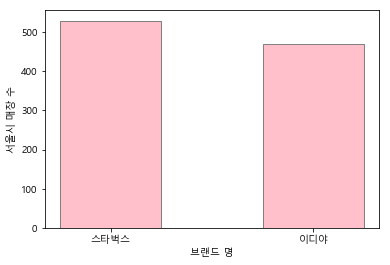

<Figure size 432x288 with 0 Axes>

In [39]:
x = np.arange(2)
years = ['스타벅스','이디야'];
values = [starbucks_count, ediya_count]

plt.bar(x, values, width=0.5, color="pink",
        edgecolor="gray", linewidth=1 )
plt.xlabel("브랜드 명")
plt.ylabel("서울시 매장 수")
plt.xticks(x, years)
plt.show()
plt.savefig("서울시 스타벅스,이디야 카페 수 바차트")

### grouby로 묶어서 구별 차트 그리기

In [80]:
starbucks = pd.read_csv('서울스타벅스매장정보.csv', index_col=0, encoding='utf-8-sig', engine='python')

starbucks.head() #작업내용 확인용 출력

,주소명,위도,경도,시도명,시군구명
매장명,,,,,
역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069,서울특별시,강남구
논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223,서울특별시,강남구
신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563,서울특별시,강남구
국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495,서울특별시,강남구
스탈릿대치R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583,서울특별시,강남구


In [83]:
pd.DataFrame(starbucks.groupby(['시군구명'])['주소명'].count())

,주소명
시군구명,
강남구,81
강동구,15
강북구,5
강서구,16
관악구,11
광진구,16
구로구,11
금천구,11
노원구,12


In [101]:
star_gu_list = pd.DataFrame(starbucks.groupby(['시군구명'])['주소명'].count()).reset_index()

In [107]:
star_gu_list.rename(columns={"주소명":"매장수"}, inplace=True)

In [108]:
star_gu_list.rename(columns={"시군구명":"구"}, inplace=True)

In [109]:
star_gu_list

,구,매장수
0,강남구,81
1,강동구,15
2,강북구,5
3,강서구,16
4,관악구,11
5,광진구,16
6,구로구,11
7,금천구,11
8,노원구,12
9,도봉구,2


In [104]:
import seaborn as sns

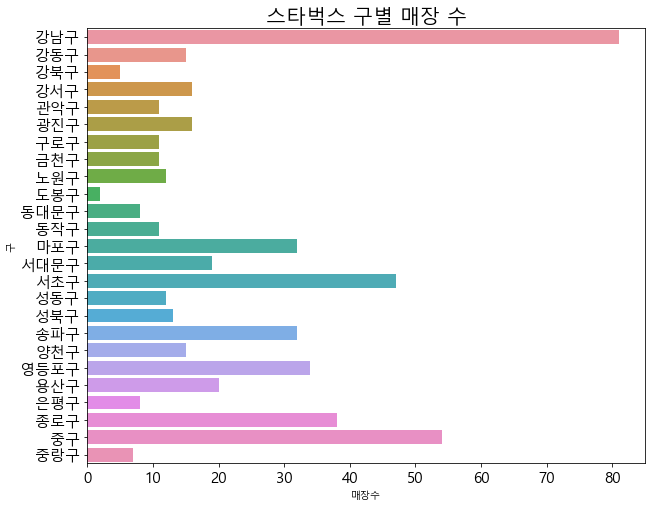

<Figure size 432x288 with 0 Axes>

In [193]:
plt.figure(figsize=(10, 8))
plt.title("스타벅스 구별 매장 수")
plt.rc('ytick', labelsize=30)
plt.rc('xtick', labelsize=15)
plt.rc('axes', titlesize=20)
sns.barplot(data=star_gu_list, x="매장수",y="구", linewidth=5)
plt.show()
plt.savefig("서울시 구별 스타벅스 매장 수")

### 이디야 구별 매장 수

In [158]:
ediya = pd.read_csv('서울이디야매장정보.csv', index_col=0, encoding='utf-8-sig', engine='python')

ediya.head() #작업내용 확인용 출력

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
상가업소번호,,,,,,,,,,,,,,,,,,,,,
25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,1.156010e+24,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1.0,NaN,126.918062,37.515118
20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,1.153010e+24,이마트구로점,서울특별시 구로구 디지털로32길 43,152050,8379.0,NaN,3.0,NaN,126.897870,37.484385
23258426,이디야커피,중계롯데우성점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,1.135010e+24,우성아파트,서울특별시 노원구 노원로22길 34,139918,1746.0,NaN,2.0,NaN,127.072754,37.646364
20022357,이디야커피,금호역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,1.120010e+24,NaN,서울특별시 성동구 장터길 17-1,133807,4724.0,NaN,1.0,2.0,127.017791,37.548427
20388455,이디야커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,1.168010e+24,NaN,서울특별시 강남구 테헤란로104길 8,135280,6174.0,NaN,1.0,NaN,127.064790,37.508585


In [159]:
pd.DataFrame(ediya.groupby(['시군구명'])['지점명'].count())

,지점명
시군구명,
강남구,32
강동구,13
강북구,9
강서구,33
관악구,20
광진구,12
구로구,17
금천구,10
노원구,18


In [163]:
ediya_list = pd.DataFrame(ediya.groupby(['시군구명'])['지점명'].count()).reset_index()

In [164]:
ediya_list.rename(columns={"지점명":"매장수"}, inplace=True)

In [165]:
ediya_list.rename(columns={"시군구명":"구"}, inplace=True)

In [166]:
ediya_list

,구,매장수
0,강남구,32
1,강동구,13
2,강북구,9
3,강서구,33
4,관악구,20
5,광진구,12
6,구로구,17
7,금천구,10
8,노원구,18
9,도봉구,7


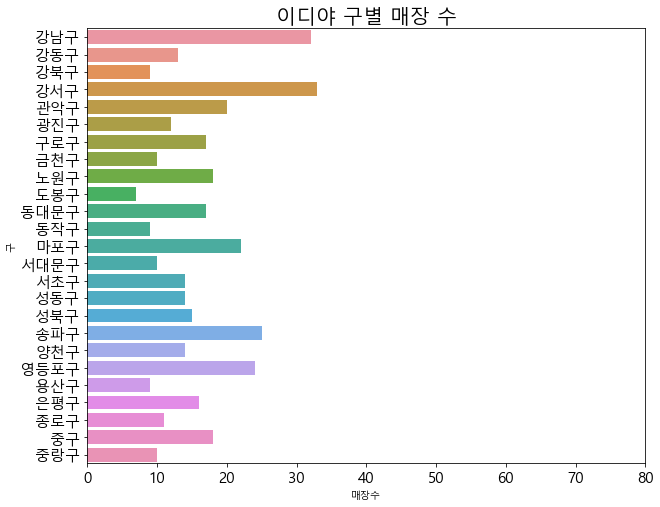

<Figure size 432x288 with 0 Axes>

In [204]:
plt.figure(figsize=(10, 8))
plt.xlim([0, 80])
plt.title("이디야 구별 매장 수")
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', titlesize=20)
sns.barplot(data=ediya_list, x="매장수",y="구", linewidth=5)
plt.show()
plt.savefig("서울시 구별 이디야 매장 수")

### 서울 지역별 소득 

In [197]:
seoul = pd.read_csv('서울_지역별_소득.csv', index_col=0,  engine='python')

seoul.head() #작업내용 확인용 출력

,구,인원,금액,평균
행정구역,,,,
서울,강남구,206821,14403588,69.642773
서울,강동구,165248,6291291,38.071813
서울,강북구,103391,2913526,28.179687
서울,강서구,242516,8809099,36.323785
서울,관악구,212016,6521099,30.757580


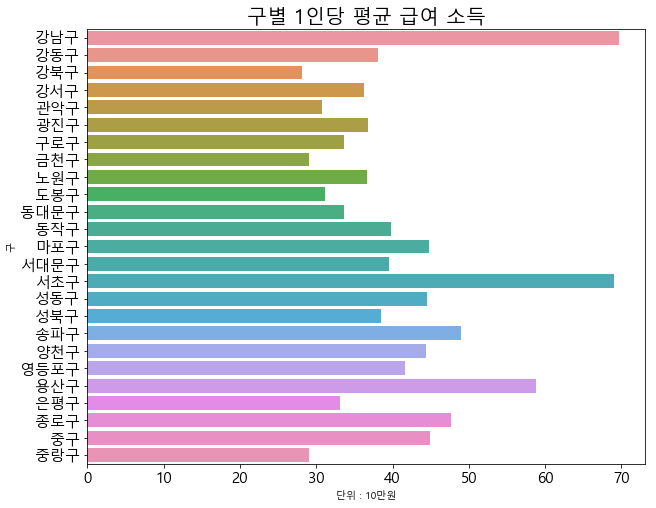

In [229]:
plt.figure(figsize=(10, 8))
plt.title("구별 1인당 평균 급여 소득")
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', titlesize=20)
plt.xlabel("단위 : 10만원")
sns.barplot(data=seoul, x="평균",y="구", linewidth=5)
plt.xlabel("단위 : 10만원")
plt.show()